In [3]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

names = ['sepal-length','sepal-width','petal-length','petal-width','class'];
dataset = pd.read_csv("iris.data",names=names);

print(dataset.head());




   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

array = dataset.values;
X = array[:,0:4];
Y = array[:,4];
t_size = 0.25;

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=t_size);

knn = KNeighborsClassifier(n_neighbors=40);
knn.fit(X_train,Y_train);

predictions = knn.predict(X_test);

print(accuracy_score(Y_test,predictions));
print(confusion_matrix(Y_test,predictions));
print(classification_report(Y_test,predictions));

print(dataset.shape);

#KNN doesn't always perform well with high-dimensionality or categorical features.

 

0.9736842105263158
[[12  0  0]
 [ 0 16  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.90      1.00      0.95         9

    avg / total       0.98      0.97      0.97        38

(150, 5)


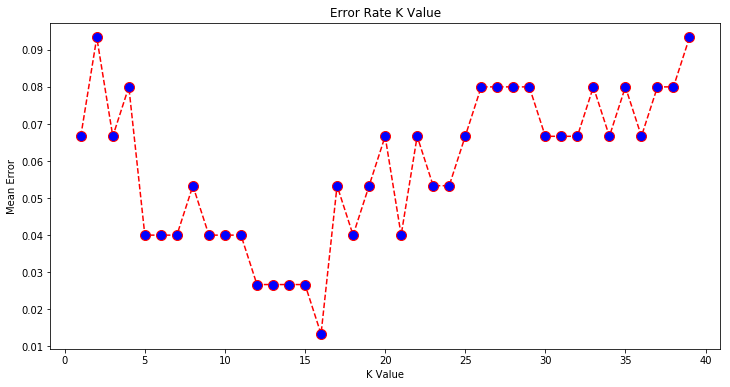

In [8]:
error = []

import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()

In [11]:
predicted= knn.predict([[5.3,3.5,1.4,.2]]) 
print ("Predicted Value:", predicted)

Predicted Value: ['Iris-setosa']
